# Used Car Re-Selling Price Prediction.
We have a data set that contains the data for used cars and their features such as :

- Name : The brand and model of the vehicle.
- Location: The place where the car is available for purchase.
- Year: The manufacturing year of the car.
- Kilometers_Driven: The total distance covered by the car in kilometers under previous ownership.
- Fuel_Type: The type of fuel used by the car, such as Petrol, Diesel, Electric, CNG, or LPG.
- Transmission: The type of gearbox used in the car, either Automatic or Manual.
- Owner_Type: Whether the car is a First-hand, Second-hand, or other.
- Mileage: The standard fuel efficiency offered by the car company, measured in kilometers per liter (kmpl) or kilometers per kilogram km/kg.
- Engine: The volume of the car's engine measured in cubic centimeters (CC).
- Power: The maximum power output of the car's engine measured in brake horsepower (bhp).
- Seats: The number of seats available in the car.
- New_Price: The cost of a brand-new car of the same model.

Our primary objective is to predict the resale price of a used car based on this dataset. The output column for our purpose:

- Price: The resale value of the used car in Lakhs INR.

## Steps for machine learning :
1. Data Gathering. 
2. Data Pre-Processing .
3. Choosing a Model.
4. Train the Model.
5. Data Evalution and Testing .

## 1. Data Gathering   
The data-set was downloaded from [here.](https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=train-data.csv)

We shall use the file  ***train-data.csv*** for both training the model and testing purposes.

## 2. Data Pre-Processing .

We Import the necessary libraries for data pre-processing

In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

We will use the unnamed index column for indexing.

In [2]:
train_data = pd.read_csv('train-data.csv',index_col= 'Unnamed: 0')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


We delete the column **'New_Price'**  as it contains excessive null values and is not necessary for our purpose. 

In [4]:
train_data.drop('New_Price', axis = 1, inplace= True)

### Cleaning the `null` Values
Checking for `null` values :

In [5]:
print(train_data.isnull().sum())

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64


We remove the `null` values in the columns :**Mileage** ,**Engine** , **Power** and **Seats**.

In [6]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### Correcting the Data Inconsistencies
- We shall transform any `str` data type to `int` or `float` so that it can be processed by the algorithm during training.
- We will also correct any inconsistencies that may exist.

#### Name

In [7]:
print(train_data['Name'].value_counts())

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1855, dtype: int64


The **Name** column has excessive values to sort, we shall separate the brand and model name it into two columns : **Brand** and **Model** and analyse them. If the column,is easy to process we shall incorporate it for training the model.

In [8]:
train_data['Brand'] = train_data["Name"].apply(lambda x:x.split()[0])
train_data['Model'] = train_data["Name"].apply(lambda x:' '.join(str(i) for i in  x.split()[1:]))


##### Brand

In [9]:
print(train_data['Brand'].value_counts(ascending=True))

Brand
Lamborghini         1
Isuzu               1
Ambassador          1
Smart               1
Bentley             1
ISUZU               2
Force               3
Datsun             13
Jeep               15
Porsche            18
Volvo              21
Fiat               25
Mini               26
Mitsubishi         27
Jaguar             40
Land               57
Nissan             91
Chevrolet         121
Renault           145
Skoda             173
Tata              186
Audi              236
BMW               262
Mahindra          271
Ford              298
Volkswagen        315
Mercedes-Benz     318
Toyota            409
Honda             601
Hyundai          1100
Maruti           1197
Name: count, dtype: int64


We shall remove the values with very few instances to avoid outliers.

In [10]:
# Function to get index of all the values.
indices = []
def get_index(values : list,):
    for a in values:
        indices.append(train_data[train_data['Brand'] == a].index.tolist())
    return indices
indices = get_index(['Lamborghini','Isuzu','Ambassador','Smart','Bentley','ISUZU','Force'])
for i in indices:
    train_data.drop(index = i,inplace = True,axis =0)

We convert the `str` data to `int` using `LabelEncoder`.

In [11]:
leb = LabelEncoder()
train_data['Brand'] = leb.fit_transform(train_data['Brand'])

We acquire the values for future reference

In [12]:
print("Brands :",leb.classes_)

Brands : ['Audi' 'BMW' 'Chevrolet' 'Datsun' 'Fiat' 'Ford' 'Honda' 'Hyundai'
 'Jaguar' 'Jeep' 'Land' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini'
 'Mitsubishi' 'Nissan' 'Porsche' 'Renault' 'Skoda' 'Tata' 'Toyota'
 'Volkswagen' 'Volvo']


##### Model

In [13]:
print(train_data['Model'].value_counts(ascending=True))

Model
Xylo D4 BSIV                     1
Figo 1.2P Titanium MT            1
Xcent 1.2 VTVT SX                1
Renault Logan 1.4 GLX Petrol     1
Octavia 1.9 TDI                  1
                                ..
Swift VDI BSIV                  31
Swift Dzire VDI                 34
City 1.5 S MT                   34
Swift VDI                       45
XUV500 W8 2WD                   49
Name: count, Length: 1847, dtype: int64


We will use the **Brand** column to train the data and remove the **Name** and **Model** columns as they don't fit our standards and to avoid overfitting.

In [14]:
train_data.drop(columns=["Name",'Model'],inplace = True)

#### Location

In [15]:
print(train_data['Location'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


We shall convert the `str` values to `int` using `Label Encoder`

In [16]:
lel = LabelEncoder()
train_data['Location'] = lel.fit_transform(train_data['Location'])

We get the values for future reference

In [17]:
print('Locations :',lel.classes_)

Locations : ['Ahmedabad' 'Bangalore' 'Chennai' 'Coimbatore' 'Delhi' 'Hyderabad'
 'Jaipur' 'Kochi' 'Kolkata' 'Mumbai' 'Pune']


#### Transmission


In [18]:
print(train_data['Transmission'].value_counts())

Transmission
Manual       4260
Automatic    1705
Name: count, dtype: int64


#### Transforming the `str` to `int` or `float` for processing
We shall label 'Manual' as 0 and 'Automatic' as 1.

In [19]:
train_data['Transmission']=train_data['Transmission'].replace({'Manual':0,'Automatic':1 })

#### Year

In [20]:
train_data['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

#### Kilometers Driven

In [21]:
train_data['Kilometers_Driven'].unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365], dtype=int64)

#### Fuel Type

In [22]:
train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

##### Transforming the `str` to `int` so that we can use it to train our algorithm. 
We shall label 'Diesel' as 0, 'Petrol' as 1, 'CNG' as 2, 'LPG' as 3.  

In [23]:
train_data['Fuel_Type']=train_data['Fuel_Type'].replace({'Diesel':0,
                         'Petrol':1,
                         'CNG':2,
                         'LPG':3})

#### Owner Type 

In [24]:
train_data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

##### Convert the `str`  to `int` values.  
We shall label 'First' : 1, 'Second': 2, 'Third' : 3, 'Fourth & Above' : 4.

In [25]:
train_data['Owner_Type']=train_data['Owner_Type'].replace({'First':1,
                                               'Second':2,
                                               'Third':3,
                                               'Fourth & Above':4})

#### Mileage

In [26]:
train_data['Mileage'].head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

The values in this column have two unit suffixes **kmpl** and **km/kg.**  
We will first convert the **km/kg** value to **km/litre** (Since the latter seems to have more values) and then remove the unit suffix while ensuring the resultant value is saved as a  `float`.

In [27]:
def convert_Milage(x):
    if str(x).endswith("km/kg"):
        return float(x.split(' ')[0])*0.74
    elif str(x).endswith("kmpl"):
        return float(x.split(' ')[0])

# We put the function inside the apply function    
train_data['Mileage'] = train_data['Mileage'].apply(convert_Milage)

#### Engine


In [28]:
train_data['Engine'].head()

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
Name: Engine, dtype: object

Remove the 'cc' unit suffix and ensure that the values are saved as `int`.

In [29]:
train_data['Engine']= train_data['Engine'].apply(lambda x:int(x.split(' ')[0]))

#### Power

In [30]:
train_data['Power'].head()

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

##### Remove the 'bhp' unit suffix.

In [31]:
def convert_Power(x):
    try:
        x = x.split(' ')[0]
        if type(x) == str :
            return float(x)
    except:
        return 0
    
train_data['Power']= train_data['Power'].apply(convert_Power)

#### Seats   

In [32]:
print(train_data['Seats'].unique())

[ 5.  7.  8.  4.  6.  2. 10.  9.  0.]


##### Remove the entry with 0 seats

In [33]:
train_data.drop(index= train_data[train_data['Seats'] == 0].index,inplace=True)

### A final evaluation before we move onto Model training.

In [34]:
print(train_data.head(10))

   Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0         9  2010              72000          2             0           1   
1        10  2015              41000          0             0           1   
2         2  2011              46000          1             0           1   
3         2  2012              87000          0             0           1   
4         3  2013              40670          0             1           2   
5         5  2012              75000          3             0           1   
6         6  2013              86999          0             0           1   
7         9  2016              36000          0             1           1   
8        10  2013              64430          0             0           1   
9         2  2012              65932          0             0           2   

   Mileage  Engine   Power  Seats  Price  Brand  
0   19.684     998   58.16    5.0   1.75     12  
1   19.670    1582  126.20    5.0  12.50      7  
2 

## 3. Choosing a model

Regression should be used for predicting the **Price** ,as our target variable it is continuous, meaning it can take any numerical value within a given range.  
Regression will allow us to establish the relationship between the independent variables **(features)** and the dependent variable **(Price)** in the dataset, and make predictions on new data points.

Regression models that we will be using are as follows :
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- K-Nearest Neighbours Regression

Import the necessary libraries for model training.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

##  Train the model
We shall use the **Price** column as our output/target column and rest of the **features** as our output. We split the input and output data for training and testing using the `train_test_split()`,we specify our test size to 15% .

In [36]:
y = train_data['Price']
x = train_data.drop(columns='Price')
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

### Linear Regression
Linear regression is a statistical technique that aims to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data, making it suitable for predicting continuous numerical values.

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_predicted = lr.predict(x_test)
lr_Test_Acc = int(lr.score(x_train,y_train)*100)

### Decision Tree Regressor
Decision tree regressor is a predictive model that uses a binary tree structure to make sequential decisions based on feature values, allowing it to predict continuous values by traversing the tree from the root to a leaf node representing the predicted value.

In [38]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_predicted = dtr.predict(x_test)
dtr_Test_Acc = int(dtr.score(x_train,y_train)*100)

###  Random Forest Regression
Random forest regressor is an ensemble learning method that combines multiple decision tree regressors, each trained on a random subset of the data and features, to make predictions by averaging the individual tree predictions, resulting in improved accuracy and reduced overfitting compared to a single decision tree.

In [39]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_predicted = rfr.predict(x_test)
rfr_Test_Acc = int(rfr.score(x_train,y_train)*100)

### K-Nearest Neighbour Regression
KNN regression is a non-parametric algorithm that predicts the value of a new data point by considering the average of the target values of its k-nearest neighbours, making it useful for making predictions based on similar instances in the feature space.

In [40]:
knr = KNeighborsRegressor(weights='distance')
knr.fit(x_train,y_train)
knr_predicted = knr.predict(x_test)
knr_Test_Acc = int(knr.score(x_train,y_train)*100)

## 5. Data Evaluation and Testing .
We shall visualize our testing accuracy and prediction errors by comparing the different model's performance through graphs using matplotlib.

In [41]:
import matplotlib.pyplot as plt

### Training Accuracy
Using the built-in `score()` function we shall find the trianing accuracies of the models.

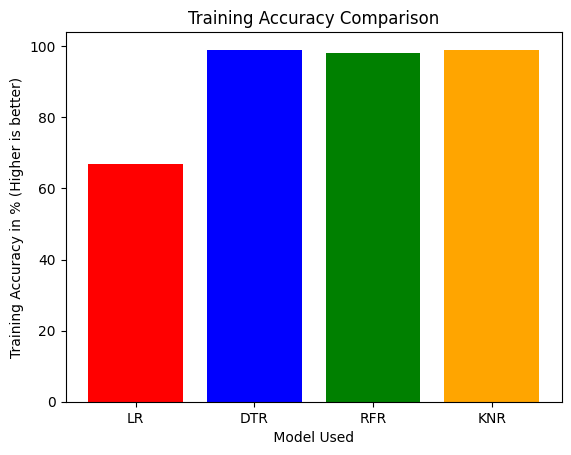

In [42]:
plt.bar(['LR','DTR','RFR','KNR'],
        height=[lr_Test_Acc,
                dtr_Test_Acc,
                rfr_Test_Acc,
                knr_Test_Acc]
        ,color=['red','blue','green','orange'])
plt.xlabel(" Model Used ")
plt.ylabel('Training Accuracy in % (Higher is better)')
plt.title('Training Accuracy Comparison')
plt.show()

### Error evaluation

Commonly used features for error evaluation for regression include Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE) and $R^2 Score$. These error metrics provide different insights into a model's performance, in predicting the data. 

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

#### Mean Squared Error
Mean Squared Error (MSE) is an error metric used to assess the performance of regression models. It calculates the average of the squared differences between predicted and actual values, providing a measure of the model's prediction accuracy.A lower MSE indicates that the model's predictions are closer to the actual values, which signifies higher accuracy and better performance.

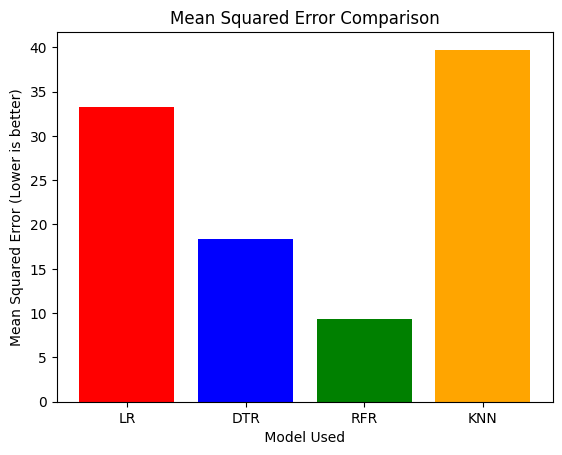

In [44]:
lr_mse = mean_squared_error(y_test,lr_predicted)
dtr_mse = mean_squared_error(y_test,dtr_predicted)
rfr_mse = mean_squared_error(y_test,rfr_predicted)
knr_mse = mean_squared_error(y_test,knr_predicted)

plt.bar(['LR','DTR','RFR','KNN'],
        height=[lr_mse,
                dtr_mse,
                rfr_mse,
                knr_mse]
        ,color=['red','blue','green','orange'])
plt.xlabel(" Model Used ")
plt.ylabel("Mean Squared Error (Lower is better)")
plt.title('Mean Squared Error Comparison')
plt.show()

#### Mean Absolute Percentage Error (MAPE)

MAPE (Mean Absolute Percentage Error) is an error metric used to evaluate the accuracy of a forecasting or regression model. It measures the average percentage difference between the predicted values and the corresponding actual values, providing a relative measure of prediction accuracy. A lower MAPE indicates better predictive performance of the model.

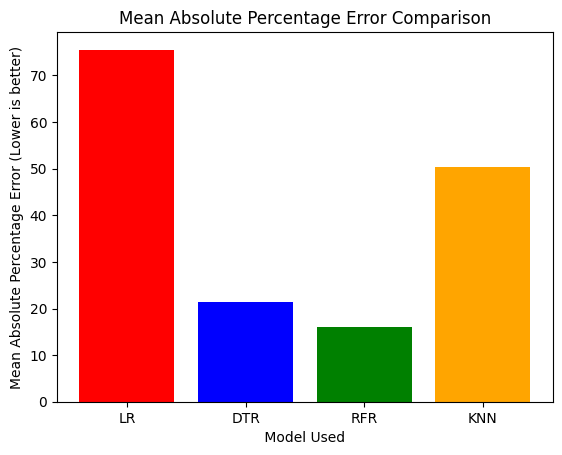

In [45]:
lr_mape = mean_absolute_percentage_error(y_test,lr_predicted)
dtr_mape = mean_absolute_percentage_error(y_test,dtr_predicted)
rfr_mape = mean_absolute_percentage_error(y_test,rfr_predicted)
knr_mape = mean_absolute_percentage_error(y_test,knr_predicted)

plt.bar(['LR','DTR','RFR','KNN'],
        height=[lr_mape,
                dtr_mape,
                rfr_mape,
                knr_mape]
        ,color=['red','blue','green','orange'])
plt.xlabel(" Model Used ")
plt.ylabel("Mean Absolute Percentage Error (Lower is better)")
plt.title('Mean Absolute Percentage Error Comparison')
plt.show()

### Conclusion
From the above the graphs it is noted that **Random Forest Regression** has the lowest *MAPE* and *MSE* values with **Decision Tree Regression** being a close second, while **KNN** and **Linear regression** algorithms show high values in both the error metrics. 
This maybe due to the following factors :

- **Lack of Local Smoothness :** In regression problems, the assumption of local smoothness implies that nearby data points should have similar target values. However, this assumption may not always hold true for all datasets. In cases where the target variable shows high variability in the vicinity of a data point, **KNN** may fail to capture the underlying patterns accurately.
  
- **Non-Linearity in the Data:** **Linear Regression** assumes a linear relationship between the independent variables (features) and the dependent variable (target/output). If the true relationship between the variables is non-linear, linear regression will fail to capture this complexity, leading to inaccurate predictions. In such cases, the model's predictions may deviate significantly from the actual values, resulting in poor accuracy. 

**Decision Trees** and **Random Forests** are not affected by these factors because they make splits based on the individual features and do not rely on linear combinations.
